# CMPE482 Spring 2021 - Assignment 1
## Ege Can KAYA - 2018400018
### Question 1

#### Implement the Gram-Schmidt algorithm.

In [1]:
import numpy as np


def gram_schmidt(X):
    matrix = X.copy()
    dim = matrix.shape[0]

    for i in range(dim):
        col = matrix[:, i]

        for j in range(0, i):
            prev_col = matrix[:, j]
            col = col - (np.inner(prev_col, col) * prev_col)
        
        # linear dependence check
        if (col == np.zeros(dim)).all():
            return

        norm = np.linalg.norm(col)
        matrix[:, i] = col / norm

    return matrix

#### Generate a $5\times5$ matrix called $X$, where each element is drawn from the unit Gaussian distribution.

In [2]:
X = np.random.normal(0, 1, (5, 5))
print("X = ", X)

X =  [[-0.91194566  0.98670355 -0.47308373 -2.26386805  0.51351931]
 [-0.30549204  1.08575122 -0.65437314 -1.13836092  0.88708524]
 [-0.27943408  0.971599    0.55943147  0.06107809  0.79512155]
 [ 1.53259791 -0.39237036 -0.07630688 -0.73387145  0.92989475]
 [ 0.27913483 -0.74661039 -1.42788158 -1.85538358 -0.44090776]]


#### Use your Gram-Schmidt algorithm to obtain the decomposition $X = QR$ where $Q$ has orthonormal columns and $R$ is upper triangular.

In [3]:
Q = gram_schmidt(X)
print("Q = ", Q)
R = np.linalg.inv(Q) @ X
print("R = ", R)

Q =  [[-0.49241684  0.24794067 -0.32496522 -0.73049495  0.23838166]
 [-0.16495438  0.58672332 -0.4842388   0.59297705  0.20600194]
 [-0.15088404  0.52231179  0.23658178 -0.08748206 -0.80050006]
 [ 0.82754604  0.42754113 -0.10654826 -0.32391727  0.12689051]
 [ 0.15072246 -0.37239782 -0.76979668 -0.04668881 -0.49379737]]
R =  [[ 1.85197902e+00 -1.24880314e+00 -2.18744481e-02  4.06368278e-01
   1.83910714e-01]
 [-4.55124462e-17  1.49943874e+00  2.90080627e-01 -8.20125504e-01
   1.62485863e+00]
 [ 6.81873706e-17  1.85131694e-16  1.71026878e+00  2.80782770e+00
  -1.67995074e-01]
 [ 4.42155053e-17  1.83475279e-17 -8.75561868e-19  1.29771831e+00
  -1.99284447e-01]
 [-8.16512858e-17 -1.80241073e-18 -2.80116858e-17  7.21680816e-17
   4.37391809e-03]]


#### Print out the following quantities to show that your algorithm works as intended:

#### a. $Q^{T}Q$

In [5]:
epsilon = 1e-12
A = np.transpose(Q) @ Q
print(A)
print("Rounding out the very small terms to 0")
A[np.abs(A) < epsilon] = 0
print(A)

[[ 1.00000000e+00 -5.76330878e-17  2.02803527e-17 -1.06619266e-16
   2.70475894e-14]
 [-5.76330878e-17  1.00000000e+00  3.75054512e-17 -3.57557680e-17
   1.43176801e-14]
 [ 2.02803527e-17  3.75054512e-17  1.00000000e+00 -3.47946542e-16
  -8.79818002e-15]
 [-1.06619266e-16 -3.57557680e-17 -3.47946542e-16  1.00000000e+00
  -5.04729148e-15]
 [ 2.70475894e-14  1.43176801e-14 -8.79818002e-15 -5.04729148e-15
   1.00000000e+00]]
Rounding out the very small terms to 0
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


#### b. $QQ^{T}$

In [6]:
B = Q @ np.transpose(Q)
print(B)
print("Rounding out the very small terms to 0")
B[np.abs(B) < epsilon] = 0
print(B)

[[ 1.00000000e+00  6.25791098e-16  2.97782062e-15  6.96944046e-15
   2.76959146e-15]
 [ 6.25791098e-16  1.00000000e+00 -3.89965440e-15  7.00523171e-15
  -1.26359598e-15]
 [ 2.97782062e-15 -3.89965440e-15  1.00000000e+00 -2.46599316e-14
  -5.40304936e-15]
 [ 6.96944046e-15  7.00523171e-15 -2.46599316e-14  1.00000000e+00
  -1.47159830e-14]
 [ 2.76959146e-15 -1.26359598e-15 -5.40304936e-15 -1.47159830e-14
   1.00000000e+00]]
Rounding out the very small terms to 0
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


#### c. $R$

In [7]:
epsilon = 1e-12
R = np.linalg.inv(Q) @ X
print(R)
print("Rounding out the very small terms to 0")
R[np.abs(R) < epsilon] = 0
print(R)

[[ 1.85197902e+00 -1.24880314e+00 -2.18744481e-02  4.06368278e-01
   1.83910714e-01]
 [-4.55124462e-17  1.49943874e+00  2.90080627e-01 -8.20125504e-01
   1.62485863e+00]
 [ 6.81873706e-17  1.85131694e-16  1.71026878e+00  2.80782770e+00
  -1.67995074e-01]
 [ 4.42155053e-17  1.83475279e-17 -8.75561868e-19  1.29771831e+00
  -1.99284447e-01]
 [-8.16512858e-17 -1.80241073e-18 -2.80116858e-17  7.21680816e-17
   4.37391809e-03]]
Rounding out the very small terms to 0
[[ 1.85197902 -1.24880314 -0.02187445  0.40636828  0.18391071]
 [ 0.          1.49943874  0.29008063 -0.8201255   1.62485863]
 [ 0.          0.          1.71026878  2.8078277  -0.16799507]
 [ 0.          0.          0.          1.29771831 -0.19928445]
 [ 0.          0.          0.          0.          0.00437392]]


#### D. $QR-X$

In [8]:
epsilon = 1e-12
D = Q @ R - X
print(D)
print("Rounding out the very small terms to 0")
D[np.abs(D) < epsilon] = 0
print(D)

[[ 0.00000000e+00  1.11022302e-16  5.55111512e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.11022302e-16 -2.22044605e-16 -1.80411242e-16
   1.11022302e-16]
 [ 0.00000000e+00 -1.11022302e-16  4.16333634e-17  0.00000000e+00
  -1.11022302e-16]
 [ 0.00000000e+00 -1.11022302e-16  2.22044605e-16  2.22044605e-16
  -1.11022302e-16]]
Rounding out the very small terms to 0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Question 2
#### Consider the matrix $Y = \begin{bmatrix}
1 & -4\\
2 & 1
\end{bmatrix} $. Draw the columns of this matrix as two vectors in $\mathbb{R}^2$.

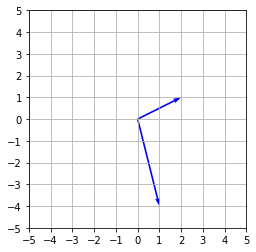

In [9]:
import matplotlib.pyplot as plt

def grid_setup():
    major_ticks = np.arange(-5, 6)    
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(b=True, which='major')
    plt.gca().set_aspect("equal")
    plt.gca().set_xticks(major_ticks)
    plt.gca().set_yticks(major_ticks)
    plt.show()

origin = np.zeros([2, 2])
Y = np.array([[1., -4.], [2., 1.]])
plt.quiver(*origin, Y[:, 0], Y[:, 1], angles='xy', scale_units='xy', color=['b', 'b'], scale=1)
grid_setup()

#### Then compute the $QR$-decomposition of this matrix using the algorithm you developed in Q1 and plot the columns of the resulting $Q$ matrix in $\mathbb{R}^2$.

Q =  [[ 0.4472136  -0.89442719]
 [ 0.89442719  0.4472136 ]]

R =  [[ 2.23606798 -0.89442719]
 [ 0.          4.02492236]]


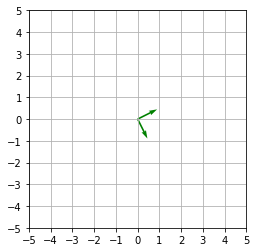

In [10]:
Q = gram_schmidt(Y)
R = np.linalg.inv(Q) @ Y
print("Q = ", Q)
print()
print("R = ", R)
plt.quiver(*origin, Q[:, 0], Q[:, 1], angles='xy', scale_units='xy', color=['g', 'g'], scale=1)
grid_setup()

### Question 3
#### Let $H$ be a $200 \times 200$ Hilbert matrix whose entries are given by the equation $$H_{ij} = \dfrac{1}{i+j-1}$$ for $ 1 \leq i,j\leq 200$.

In [24]:
H = np.zeros([200, 200], dtype='float64')
for i in range(200):
    for j in range(200):
        H[i, j] = 1./(i+j+1)
print(H)

[[1.         0.5        0.33333333 ... 0.00505051 0.00502513 0.005     ]
 [0.5        0.33333333 0.25       ... 0.00502513 0.005      0.00497512]
 [0.33333333 0.25       0.2        ... 0.005      0.00497512 0.0049505 ]
 ...
 [0.00505051 0.00502513 0.005      ... 0.00253165 0.00252525 0.00251889]
 [0.00502513 0.005      0.00497512 ... 0.00252525 0.00251889 0.00251256]
 [0.005      0.00497512 0.0049505  ... 0.00251889 0.00251256 0.00250627]]


#### Form a $200\times 200$ matrix $X$ by using the equation $$X = 10^{-5}I+H.$$

In [25]:
X = 1e-5 * np.eye(200, dtype='float64') + H
print(X)

[[1.00001    0.5        0.33333333 ... 0.00505051 0.00502513 0.005     ]
 [0.5        0.33334333 0.25       ... 0.00502513 0.005      0.00497512]
 [0.33333333 0.25       0.20001    ... 0.005      0.00497512 0.0049505 ]
 ...
 [0.00505051 0.00502513 0.005      ... 0.00254165 0.00252525 0.00251889]
 [0.00502513 0.005      0.00497512 ... 0.00252525 0.00252889 0.00251256]
 [0.005      0.00497512 0.0049505  ... 0.00251889 0.00251256 0.00251627]]


#### a. Compute the $QR$-decomposition of $X$ by using the Gram-Schmidt algorithm that you implemented in Q1.

In [26]:
Q = gram_schmidt(X)
R = np.linalg.inv(Q) @ X
print("Q = ", Q)
print("R = ", R)

Q =  [[ 7.80884583e-01 -5.60666336e-01  2.53027291e-01 ... -1.49125628e-05
  -1.47463673e-05 -1.45765801e-05]
 [ 3.90438387e-01  1.57426118e-01 -5.67513334e-01 ...  2.63875052e-04
   2.58218834e-04  2.52572967e-04]
 [ 2.60292258e-01  2.50812673e-01 -3.60656439e-01 ... -6.23328939e-04
  -5.96950652e-04 -5.70951160e-04]
 ...
 [ 3.94382209e-03  1.02985712e-02  1.69341181e-02 ...  9.79880682e-01
  -4.56383096e-02 -4.41743754e-02]
 [ 3.92400389e-03  1.02474827e-02  1.68534961e-02 ...  6.48206070e-03
   9.80264994e-01 -4.51114957e-02]
 [ 3.90438387e-03  1.01968985e-02  1.67736367e-02 ...  6.77590055e-03
   6.71377594e-03  9.80647352e-01]]
R =  [[ 1.28061179e+00  7.76999624e-01  5.81787443e-01 ...  2.05271309e-02
   2.04334677e-02  2.03406710e-02]
 [ 5.23308587e-16  1.90393145e-01  2.25879353e-01 ...  2.83370132e-02
   2.82178400e-02  2.80996895e-02]
 [ 1.39744456e-15  1.16775596e-15  2.23985233e-02 ...  2.55515342e-02
   2.54556308e-02  2.53604586e-02]
 ...
 [ 5.95258440e-17  5.57626119e-17 

#### b. Implement the modified Gram-Schmidt algorithm, and compute the $QR$- decomposition of $X$ again.

In [27]:
def modified_gram_schmidt(X):
    Q = X.copy()
    R = np.zeros_like(X)
    n = X.shape[0]
    
    for i in range(n):
        v = Q[:, i]
        R[i, i] = np.linalg.norm(v)
        q = v / R[i, i]
        Q[:, i] = q
        
        for j in range(i + 1, n):
            vj = Q[:, j]
            R[i, j] = np.inner(q, vj)
            Q[:, j] = vj - R[i, j] * q
    return (Q, R)

Q, R = modified_gram_schmidt(X)
print("Q = ", Q)
print("R = ", R)

Q =  [[ 7.80884583e-01 -5.60666336e-01  2.53027291e-01 ... -1.49125628e-05
  -1.47463673e-05 -1.45765801e-05]
 [ 3.90438387e-01  1.57426118e-01 -5.67513334e-01 ...  2.63875052e-04
   2.58218834e-04  2.52572967e-04]
 [ 2.60292258e-01  2.50812673e-01 -3.60656439e-01 ... -6.23328939e-04
  -5.96950652e-04 -5.70951160e-04]
 ...
 [ 3.94382209e-03  1.02985712e-02  1.69341181e-02 ...  9.79880682e-01
  -4.56383096e-02 -4.41743754e-02]
 [ 3.92400389e-03  1.02474827e-02  1.68534961e-02 ...  6.48206070e-03
   9.80264994e-01 -4.51114957e-02]
 [ 3.90438387e-03  1.01968985e-02  1.67736367e-02 ...  6.77590055e-03
   6.71377594e-03  9.80647352e-01]]
R =  [[1.28061179e+00 7.76999624e-01 5.81787443e-01 ... 2.05271309e-02
  2.04334677e-02 2.03406710e-02]
 [0.00000000e+00 1.90393145e-01 2.25879353e-01 ... 2.83370132e-02
  2.82178400e-02 2.80996895e-02]
 [0.00000000e+00 0.00000000e+00 2.23985233e-02 ... 2.55515342e-02
  2.54556308e-02 2.53604586e-02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1

#### c. Calculate an error matrix $E=I-Q^TQ$ for each decomposition.

In [28]:
print("Calculating E for the initial Gram-Schmidt algorithm:")
Q = gram_schmidt(X)
E0 = (np.eye(200, dtype='float64') - np.transpose(Q) @ Q)
print("E0 = ", E0)

Calculating E for the initial Gram-Schmidt algorithm:
E0 =  [[ 1.11022302e-16  5.00725818e-17 -7.55846649e-15 ...  8.21977747e-14
  -6.02540189e-13 -1.65365194e-13]
 [ 5.00725818e-17 -4.44089210e-16  1.88188279e-15 ... -1.83592282e-13
  -6.06956723e-13  2.33396225e-13]
 [-7.55846649e-15  1.88188279e-15 -4.44089210e-16 ...  2.81352623e-13
  -2.33470882e-13  2.12914632e-13]
 ...
 [ 8.21977747e-14 -1.83592282e-13  2.81352623e-13 ... -2.22044605e-16
   1.16858990e-17  1.38777878e-17]
 [-6.02540189e-13 -6.06956723e-13 -2.33470882e-13 ...  1.16858990e-17
   0.00000000e+00 -6.93889390e-18]
 [-1.65365194e-13  2.33396225e-13  2.12914632e-13 ...  1.38777878e-17
  -6.93889390e-18 -2.22044605e-16]]


In [29]:
print("Calculating E for the modified Gram-Schmidt algorithm:")
Q, R = modified_gram_schmidt(X)
E1 = (np.eye(200, dtype='float64') - np.transpose(Q) @ Q)
print("E1 = ", E1)

Calculating E for the modified Gram-Schmidt algorithm:
E1 =  [[ 1.11022302e-16  5.00725818e-17 -7.55846649e-15 ...  8.21977747e-14
  -6.02540189e-13 -1.65365194e-13]
 [ 5.00725818e-17 -4.44089210e-16  1.88188279e-15 ... -1.83592282e-13
  -6.06956723e-13  2.33396225e-13]
 [-7.55846649e-15  1.88188279e-15 -4.44089210e-16 ...  2.81352623e-13
  -2.33470882e-13  2.12914632e-13]
 ...
 [ 8.21977747e-14 -1.83592282e-13  2.81352623e-13 ... -2.22044605e-16
   1.16858990e-17  1.38777878e-17]
 [-6.02540189e-13 -6.06956723e-13 -2.33470882e-13 ...  1.16858990e-17
   0.00000000e+00 -6.93889390e-18]
 [-1.65365194e-13  2.33396225e-13  2.12914632e-13 ...  1.38777878e-17
  -6.93889390e-18 -2.22044605e-16]]


#### Then, compare the performance of the algorithms by reporting the value of the largest entry (in absolute value) in these error matrices.

In [30]:
error0 = np.abs(np.amax(E0))
error1 = np.abs(np.amax(E1))
print("Highest error in E0 is ", error0)
print("Highest error in E1 is ", error1)
if error0 < error1:
    print("Classical algorithm worked better")
elif error0 > error1:
    print("Modified algorithm worked better")
else:
    print("The two algorithms worked equally good in terms of error")
        

Highest error in E0 is  9.48635294391397e-12
Highest error in E1 is  9.48635294391397e-12
The two algorithms worked equally good in terms of error


### Question 4
#### Let $f(x)=x^2+2e^x$ defined in the range $x\in (-2, 2)$. Plot the original function and 0th, 1st, 2nd and 3rd order Taylor approximations in this range, at $x_0=0.5$.

The original function:


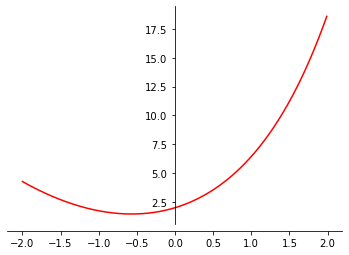

w/ 0th order Taylor approximation:


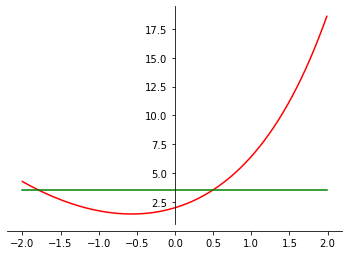

w/ 1st order Taylor approximation:


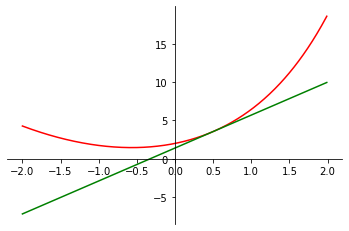

w/ 2nd order Taylor approximation:


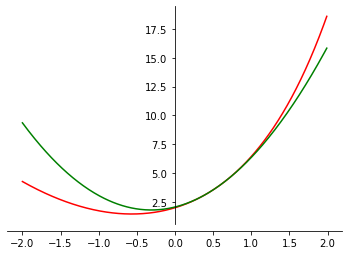

w/ 3rd order Taylor approximation:


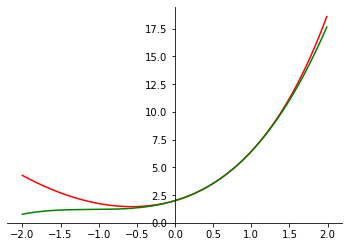

In [31]:
import jax.numpy as jnp
from jax import grad

# Setting up the axes
def setup():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

def f(x):
    return x ** 2 + 2 * jnp.exp(x)

x0 = 0.5
x = jnp.arange(-2, 2, 0.01)
Df = grad(f)
DDf = grad(Df)
DDDf = grad(DDf)

print("The original function:")
setup()
plt.plot(x, f(x), 'r')
plt.show()

print("w/ 0th order Taylor approximation:")
taylor0 = f(x0) + 0 * x
setup()
plt.plot(x, f(x), 'r')
plt.plot(x, taylor0, 'g')
plt.show()

print("w/ 1st order Taylor approximation:")
taylor1 = f(x0) + Df(x0) * (x - x0)
setup()
plt.plot(x, f(x), 'r')
plt.plot(x, taylor1, 'g')
plt.show()

print("w/ 2nd order Taylor approximation:")
taylor2 = f(x0) + Df(x0) * (x - x0) + 0.5 * DDf(x0) * (x - x0) ** 2
setup()
plt.plot(x, f(x), 'r')
plt.plot(x, taylor2, 'g')
plt.show()

print("w/ 3rd order Taylor approximation:")
taylor3 = f(x0) + Df(x0) * (x - x0) + 0.5 * DDf(x0) * (x - x0) ** 2 + (1/6) * DDDf(x0) * (x - x0) ** 3
setup()
plt.plot(x, f(x), 'r')
plt.plot(x, taylor3, 'g')
plt.show()

### Question 5
#### Suppose we have real $n\times n$ matrices $C, D, E,$ and $F$. Show how to compute the real $n\times n$ matrices $A$ and $B$ with just three real $n\times n$ matrix multiplications so that $$A+iB =(C+iD)(E+iF).$$

**Solution:** We carry out the following three matrix multiplications 
 $$X = (C+D)(E-F)$$
 $$Y = CF$$
 $$Z = DE$$
Then, we obtain the following representations for $A$ and $B$:
$$A =CE-DF \\
=CE-DF-CF+CF+DE-DE \\
=(C+D)(E-F) +CF-DE\\
= X + Y - Z $$

$$B=CF+DE \\
=Y+Z$$

### Question 6
#### The function $\phi :\mathbb{R}^3 \to \mathbb{R}$ satisfies $$\phi(1, 1,0) = -1 \\ \phi(-1, 1,1) = 1 \\ \phi(1, -1,-1) = 1.\\ $$ Choose one of the following and justify your choice: $\phi$ must be linear, $\phi$ could be linear, $\phi$ cannot be linear.

**Solution:** In order for $\phi$ to be a linear function, it must uphold the superposition property, that is, the equation

$$\phi(\alpha x+ \beta y) = \alpha \phi(x) + \beta \phi(y) \\ $$
must hold for all $x,y \in \mathbb{R}^3$ and $\alpha, \beta \in \mathbb{R}$. Notice now that

$$\phi(-1\cdot(-1, 1, 1)) = \phi (1, -1, -1) = 1 \neq -1 \cdot \phi(-1, 1, 1) = -1 \\ $$

This shows that the superposition property does not hold. Therefore, $\phi$ cannot be a linear function.